## Overview:
In this project, I will create a simple convolutional neural network [CNN] to classify handwriting digits using MNIST dataset using TensorFlow
The main goal is to deploy this network to android app using TFLite


## Requirements:
- Python 3
- Tensorflow v2 (I used v2.1.0)
- Android Studio (I used the latest v3.6.3)

## Find Me:
| | |
|-|-|
|Mail:     |ibrahimomar357@gmail.com |
|GitHub:   |https://github.com/IbrahimOmar91 |
|LinkedIn: |https://www.linkedin.com/in/ibrahimomar91/ |
|Facebook: |https://www.facebook.com/IbrahimM.Omar91 |

Imports

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Reshape, Dropout
from tensorflow.keras.utils import plot_model

In [2]:
from google.colab import drive

drive.mount('/content/drive')

# !cp /content/drive/MyDrive/abdulla/Character/anotation_28x28/Test.csv .
# !cp /content/drive/MyDrive/abdulla/Character/anotation_28x28/Train.csv .


!cp /content/drive/MyDrive/abdulla/Number/anotation_28x28/Test.csv .
!cp /content/drive/MyDrive/abdulla/Number/anotation_28x28/Train.csv .

!rm -rf sample_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

Load MNIST Dataset

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    5925
1    5924
2    5924
3    5924
4    5924
5    5924
6    5924
7    5924
8    5924
9    5924
Name: label, dtype: int64

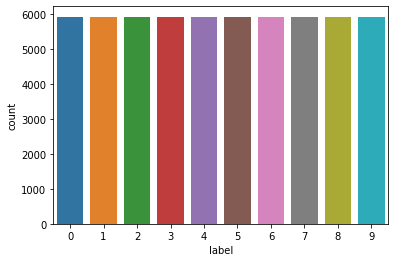

In [4]:
import seaborn as sns

Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [5]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [6]:
from sklearn.model_selection import train_test_split

# Split the train and the validation set for the fitting
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train)

In [7]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(44430, 28, 28, 1)
(44430,)
(14811, 28, 28, 1)
(14811,)


In [8]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalize data images

In [9]:
x_train = (x_train/255.).astype(np.float32)
x_test  = (x_test/255.).astype(np.float32)

Create TF Model

In [11]:
model = Sequential([
    InputLayer(input_shape=(28, 28)),
    Reshape(target_shape=(28, 28, 1)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(512),
    Dense(64),
    Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 256)        

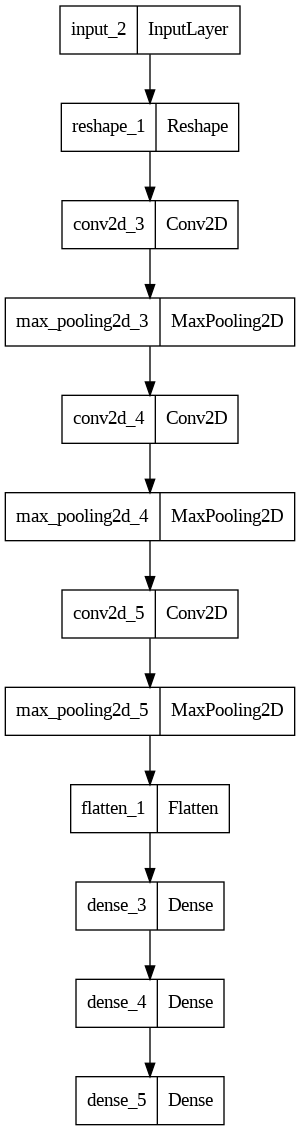

In [13]:
plot_model(model, to_file='model.png')

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
hist = model.fit(
    x_train,
    y_train,
    epochs = 30,
    batch_size = 512,
    validation_data=(x_test, y_test)
)

Epoch 1/30
87/87 [==============================] - 8s 36ms/step - loss: 0.6414 - accuracy: 0.7955 - val_loss: 0.2274 - val_accuracy: 0.9290
Epoch 2/30
87/87 [==============================] - 2s 24ms/step - loss: 0.1580 - accuracy: 0.9528 - val_loss: 0.1312 - val_accuracy: 0.9586
Epoch 3/30
87/87 [==============================] - 2s 23ms/step - loss: 0.0990 - accuracy: 0.9707 - val_loss: 0.1287 - val_accuracy: 0.9607
Epoch 4/30
87/87 [==============================] - 2s 22ms/step - loss: 0.0774 - accuracy: 0.9766 - val_loss: 0.0839 - val_accuracy: 0.9753
Epoch 5/30
87/87 [==============================] - 2s 22ms/step - loss: 0.0571 - accuracy: 0.9826 - val_loss: 0.0721 - val_accuracy: 0.9788
Epoch 6/30
87/87 [==============================] - 2s 24ms/step - loss: 0.0494 - accuracy: 0.9844 - val_loss: 0.0735 - val_accuracy: 0.9787
Epoch 7/30
87/87 [==============================] - 2s 24ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0674 - val_accuracy: 0.9808
Epoch 8/30
87

### Visualise Training Process

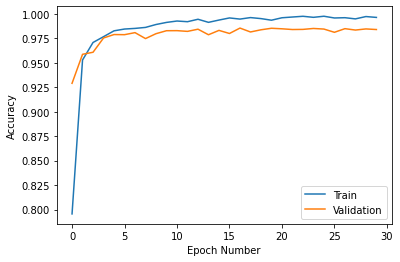

In [16]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(('Train','Validation'), loc='lower right')

### Evaluate Model

In [17]:
out = model.evaluate(x_test, y_test)
print ("Accuracy: {:0.2f}%".format(out[1]*100))

463/463 [==============================] - 2s 3ms/step - loss: 0.0802 - accuracy: 0.9839
Accuracy: 98.39%


### Convert Model to TFLite and Save

In [21]:
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [22]:
tflite_model_file = "mnist_model.tflite"
open(tflite_model_file, 'wb').write(tflite_model)

2144204